# Exercises \#1 #

### Used libraries ###

In [2]:
# libraries
from scipy.stats import norm
from scipy import integrate
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division
from scipy.optimize import curve_fit, minimize
from scipy.special import factorial

### Problem 1 ###

In [3]:
# given used sources 

In [4]:
# https://rosettacode.org/wiki/Statistics/Normal_distribution#Python
# normal distribution
# from __future__ import division
# import matplotlib.pyplot as plt 
# import random

# mean1, stddev1, size1 = 200, 2, 100000
# mean2, stddev2, size2 = 100, 1, 100000
# data1 = [random.gauss(mean1, stddev1) for c in range(size1)]
# data2 = [random.gauss(mean2, stddev2) for c in range(size2)]

# mn1 = sum(data1) / size1
# sd1 = (sum(x*x for x in data1) / size1 
#       - (sum(data) / size) ** 2) ** 0.5

# mn2 = sum(data2) / size2
# sd2 = (sum(x*x for x in data2) / size1 
#       - (sum(data2) / size2) ** 2) ** 0.5

# print("Sample mean = %g; Stddev = %g; max = %g; min = %g for %i values" 
#       % (mn1, sd1, max(data1), min(data1), size1))
# print("Sample mean = %g; Stddev = %g; max = %g; min = %g for %i values" 
#       % (mn2, sd2, max(data2), min(data2), size2))

# plt.hist(data1,bins=50)
# plt.hist(data2,bins=50)

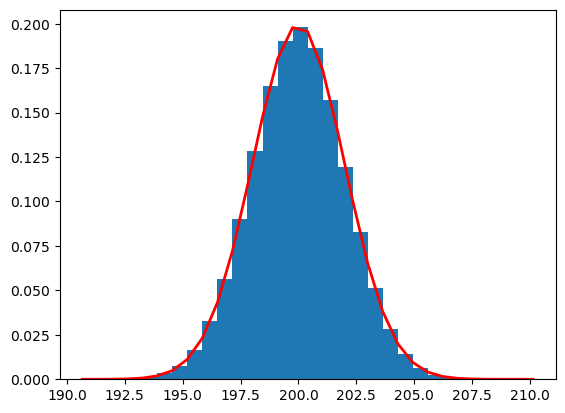

In [31]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

mu, sigma = 200, 2 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000000) # switch here for normal, lognormal, etc.

import matplotlib.pyplot as plt
counts, bins, ignoreds = [[], [], []]

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ), # bins -> x in other applications
         linewidth=2, color='r')
plt.show()



Gaussian distribution p.d.f., def as python function to use later
for integration etc.

$f\left(x\right)=\dfrac{1}{\sigma\sqrt{2\pi}}e^{-\dfrac{1}{2}\left(\dfrac{x-\mu}{\sigma}\right)^2}$

Lognormal distribution p.d.f., def as python function for later use in integration

$f(x) = \frac{1}{x\sigma\sqrt{2\pi}}\exp{\left(-\frac{\left(\ln{x-\mu}\right)^2}{2\sigma^2}\right)}$

In [28]:
# defining gaus function, integrating to get the value of probability
def gaus(x, sigma, mu):    
    # return 1/(sigma * np.sqrt(sigma * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))
    return np.multiply(np.divide(1, np.multiply(sigma, np.sqrt(np.multiply(2, np.pi)))), np.exp( - np.divide(np.power(np.divide(np.subtract(x, mu), sigma), 2), 2)))
sigma = 2
mu = 200

I, err = integrate.quad(gaus, 205, np.inf, args=(sigma,mu))
test_gaus_int_equal_one, _ = integrate.quad(gaus, -np.inf, np.inf, args=(1, 0))
print(f"this should equal 1: {test_gaus_int_equal_one}")
print(I)
print(err)
print(I**2) # two particles. can only square (multiply probabilities) because the lower limit is the same
# for 205 [GeV] or more                     0.6%    probability of production
#  199 [GeV] < particle mass < 201 [GeV]   38.3%    probability of production
# two particles w/ greater than 203 [GeV]  0.04%    probability of production

this should equal 1: 0.9999999999999997
0.006209665325776106
3.8469831597516174e-11
3.8559943458146075e-05


In [ ]:
sigma, mu = 0.9, 0.3
def lognormal(x, sigma, mu):
    front_coef = 1 / (np.sqrt(2*np.pi)*sigma*x)
    exp_power = -np.log(x/mu)**2/(2*sigma**2)
    return front_coef*np.exp(exp_power)

test_quad = integrate.quad(lognormal, 0, np.inf, args=(sigma, mu))

def avg_size(x, sigma, mu):
    front_coef = 1 / (np.sqrt(2*np.pi)*sigma*x)
    exp_power = -np.log(x/mu)**2/(2*sigma**2)
    return x*front_coef*np.exp(exp_power)   
    
test_avg_size = integrate.quad(avg_size, 0, np.inf, args=(sigma, mu))

def delta()

print(test_quad)
print(test_avg_size)


(1.0000000000006777, 5.838251874305568e-09)
(0.4497907500176589, 7.293959477786016e-09)


In [79]:
print(np.log(3-1))
print(np.log(3) - np.log(1))
print(np.log(3/1))

0.6931471805599453
1.0986122886681098
1.0986122886681098


### Problem 2 ###

Text(0.5, 1.0, 'CDF')

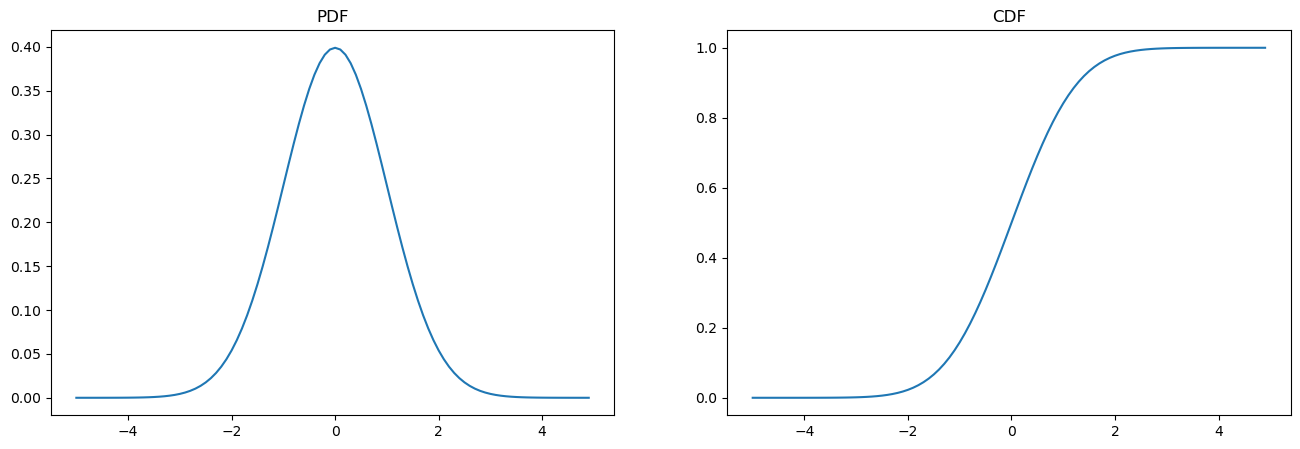

In [7]:


def gausIntegrate(sigma ,mu, lim1, lim2):
    def gaus(x):
        return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )
    I, err = integrate.quad(gaus, lim1, lim2)
    return I, err

gausIntegrate(1, 0, -np.inf, np.inf) # strange gaus integration function, not even used later

sigma = 1
mu = 0
y_cdf = []
x_values = np.arange(-5, 5, .1)
x_values2 = x_values
y_pdf = gaus(x_values, sigma, mu)
for xi in x_values:  
    cdf_value = integrate.quad(gaus, -np.inf, xi, args=(sigma,mu))[0] # using integration directly
    y_cdf.append(cdf_value)

fig, axs = plt.subplots(1, 2, figsize=(16, 5))
axs[0].plot(x_values, y_pdf)
axs[1].plot(x_values, y_cdf)
axs[0].set_title("PDF")
axs[1].set_title("CDF")
    


### Problems 3 & 4 ###

In [8]:
def random_xy(low_x, high_x, low_y, high_y, size=1000):
    """
    generates random x,y coordinates
    arguments:
    1) lower x boundary
    2) higher x boundary
    3) lower y boundary
    4) higher y boundary
    5) amount of points to generate (default = 1000)
    """
    x_coords = np.random.uniform(low_x, high_x, size)
    y_coords = np.random.uniform(low_y, high_y, size)
    return [x_coords, y_coords]

Number of random gaussian points is: 10038
Number of total generated random points: 24080
Coefficient: 2.408


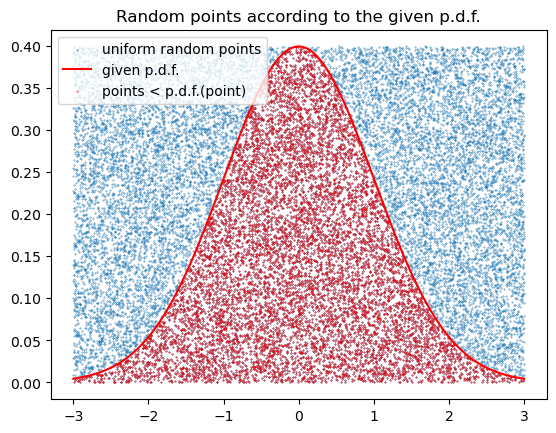

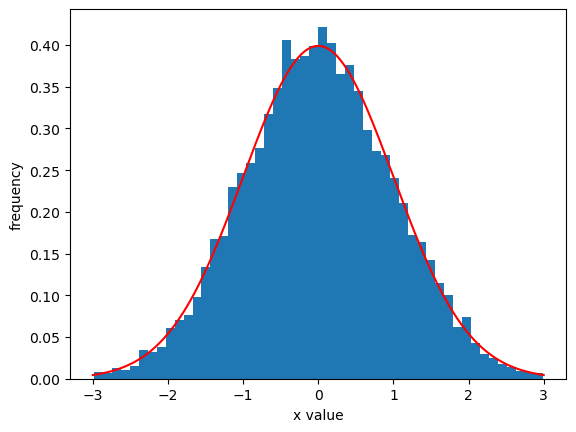

0.8105378072908456


In [9]:
def randomGen(n_events=10**4, sample_coef=2.408, pdf=gaus, params=[1, 0, 1]):
    """
    -------
    generate random numbers according to some given
    probability density function
    -------
    returns a list of the following things in the same order:
    1) x coordinates for the whole random point set
    2) y coordinates for the whole random point set
    3) x coordinates for the gaussian random points
    4) y coordinates for the gaussian random points
    5) x values for pdf/cdf
    6) y values for pdf
    7) y values for cdf (cumulative distribution function (integral of pdf))
    8) random number according to x -> c.d.f. mapping
    --------
    returned values can be used for creating matplotlib figures
    """

    # cdf things
    sigma = params[0]
    mu = params[1]
    tau = params[2]
    integration_arguments = ()
    if pdf == gaus:
        integration_arguments = (sigma, mu)
    elif pdf == pdf_exp:
        integration_arguments = (tau)

    y_cdf = []
    x_values = np.linspace(-3, 3, 1000)
    y_pdf = pdf(x_values, sigma, mu)
    for xi in x_values:  
        cdf_value = integrate.quad(pdf, -np.inf, xi, args=(sigma,mu))[0] # using integration directly
        y_cdf.append(cdf_value)
    
    # acceptance/rejection random choice
    xc_map = list(zip(x_values, y_cdf)) # x -> cdf mapping
    random_gaus = np.random.choice(x_values)
    found = 0
    for item in xc_map:
        if item[0] == random_gaus:
            found = item[1]

    # generating uniform random numbers xy coordinates
    coords = random_xy(-3, 3, 0, pdf(0, sigma, mu), int(n_events*sample_coef))
    x_coord = coords[0]
    y_coord = coords[1]

    # filtering coordinates according to the p.d.f.
    coords = list(zip(x_coord, y_coord))
    filtred_coords = [coord for coord in coords if pdf(coord[0], sigma, mu) > coord[1]]
    x_filter, y_filter = zip(*filtred_coords) if filtred_coords else ([], [])
    print("Number of random gaussian points is: {}".format(len(filtred_coords)))
    print("Number of total generated random points: {}".format(len(x_coord)))
    print("Coefficient: {}".format(sample_coef))

    return [x_coord, y_coord, x_filter, y_filter, x_values, y_pdf, y_cdf, found] 


def test_coef(target):
    """
    tests, by what coefficient you have to
    multiply the target gaussian random points
    to get that number of gaussian random points
    """
    coef = 1
    while True:
        if len(randomGen(target, coef)[0]) >= target:
            return [coef, len(randomGen(target, coef)[0])]
        else:
            coef += .1

single_run = randomGen() # need to save returned values of single run, in order for code to work properly
# drawings
plt.figure()
plt.scatter(single_run[0], single_run[1], label='uniform random points', s=.1)
plt.plot(single_run[4], single_run[5], label='given p.d.f.', color='red')
plt.title('Random points according to the given p.d.f.')
plt.scatter(single_run[2], single_run[3], label='points < p.d.f.(point)', color='red', s=.1)
plt.legend()
plt.show()


plt.figure()
plt.xlabel('x value')
plt.ylabel('frequency')
plt.plot(single_run[4], single_run[5], label='given p.d.f.', color='red')
plt.hist(single_run[2], bins=50, density=True, label='histogram of frequencies')
plt.show()
print(single_run[7])

In [10]:
print(randomGen()[7])

Number of random gaussian points is: 9973
Number of total generated random points: 24080
Coefficient: 2.408
0.9826186186888859


### Problem 5 ###

In [11]:


def randomInversion(pdf=gaus):
    """
    generates random number
    using inversion method s.t.
    CDF(random_x) = u and x is drawn from
    the corresponding p.d.f.
    """
    # getting cdf values in y_cdf as a list
    sigma = 1
    mu = 0
    y_cdf = []
    x_values = np.linspace(-3, 3, 1000)
    y_pdf = pdf(x_values, sigma, mu)
    for xi in x_values:  
        cdf_value = integrate.quad(pdf, -np.inf, xi, args=(sigma,mu))[0] # using integration directly
        y_cdf.append(cdf_value)
    cx_map = list(zip(x_values, y_cdf))

    # generating uniform random number
    u = np.random.uniform(0, 1)

    # with generated u, find the closest x_value s.t. CDF(x) = u
    chosen_random_x = 0
    for x, cdf in cx_map:
        if abs(u-cdf) <= 0.01:
            chosen_random_x = x
    
    return chosen_random_x

randomInversion()



np.float64(0.09909909909909898)

Acceptance rejection takes $\approx 2.6$ seconds, inversion takes $\approx 1.8$ seconds. Is this objective, i dont know, because
the defined functions are quite different

# Exercises \# 2 #

we work with decay p.d.f. (exponential function):

$f\left(t;\tau\right)=\dfrac{1}{\tau}e^{-t/\tau}$

### Problem 1 ###

In [12]:
# need to extract data from a file
# using simple way, w/o pandas
dataPoints = []
with open("decay.txt", "rt") as data:
    lines = data.readlines()
    for line in lines:
        dataPoints.append(float(line))

print(type(dataPoints[0]))
print(dataPoints[0])
print(dataPoints[0:10])
print(len(dataPoints[0:10]))
print(len(dataPoints))



<class 'float'>
0.945132613182
[0.945132613182, 1.82710909843, 1.64995217323, 1.03634500504, 0.111256502569, 1.12412631512, 1.75387907028, 3.01695179939, 7.83204507828, 0.0433025658131]
10
1000


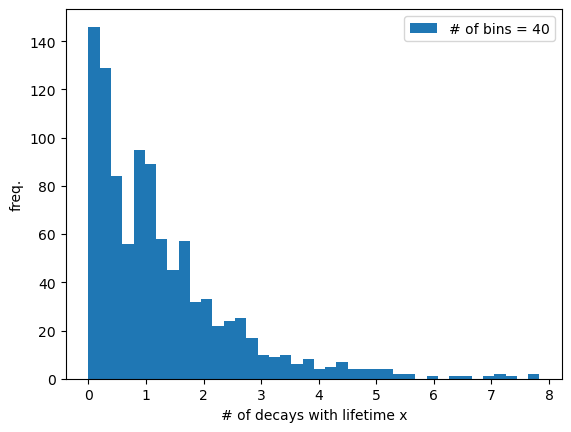

In [13]:
# plot the dataPoints from decay.txt in a histogram
plt.figure()
plt.hist(dataPoints, bins=40, label='# of bins = 40')
plt.ylabel('freq.')
plt.xlabel('# of decays with lifetime x')
plt.legend()
plt.show()

### Problem 2 ###

0.08986579282344431


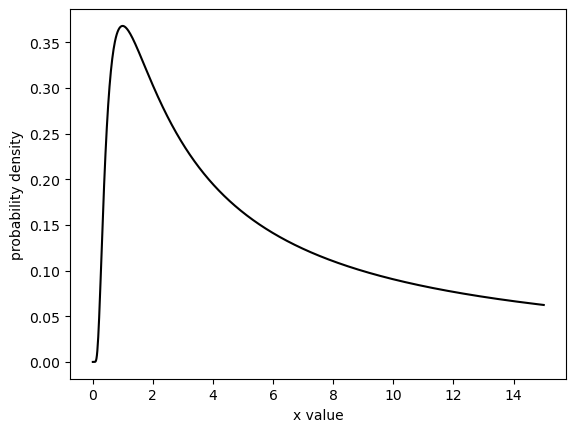

Found max x: 0.3678794211091219
Found max x index: 66
Max of p.d.f. at x = 1.0003303303303304


In [14]:
# Problem 2. a) defining theoretical p.d.f.
def pdf_exp(t, tau):
    return np.multiply(np.divide(1, tau), np.exp(np.divide(-t, tau)))

def pdf_exp_alt(t, tau):
    return 1/tau*np.exp(-t/tau)

test = pdf_exp(4, 5)
print(test)
x_exp_lifetimes = np.linspace(0.01, 15, 1000)
y_exp = pdf_exp(1, x_exp_lifetimes)
y_all = []
for xi in x_exp_lifetimes:
    y_all.append(pdf_exp_alt(1, xi))
expPdf = list(zip(x_exp_lifetimes, y_exp))

plt.figure()
plt.xlabel('x value')
plt.ylabel('probability density')
plt.plot(x_exp_lifetimes, y_exp, color='k')
plt.show()

maximum_idx = np.argmax(y_all) # get the index of maximum value of a function
x_max = y_all[maximum_idx] # get the argument according to index
print("Found max x: {}".format(x_max))
print("Found max x index: {}".format(maximum_idx))
print("Max of p.d.f. at x = {}".format(x_exp_lifetimes[maximum_idx]))
 


In [15]:
# b) probability to measure t <= 1 [s] w/ tau_mean = 2 [s]
t = 1
tau_mean = 2
I, err = integrate.quad(pdf_exp, 0, t, args=(tau_mean))
print(I)
# integrate like in the 1st day exc.


0.3934693402873665


In [16]:
# lets use the function from excs 1 on this exponential p.d.f.
# testRun_exp = randomGen(pdf_exp)


### Problem 3 ###

After discussions and looking at the presentation slides, (and looking up ln properties to derive L(tau)), we arrive at the fact, that the -2logL can be written as:

$L\left(\tau\right) = -n\ln\tau + \dfrac{\sum{t_i}}{\tau}$

used:

$\ln ab = \ln a + \ln b$

$\ln e^x = x$

$\ln \dfrac{1}{x} = -\ln x$

### Problem 4 ###

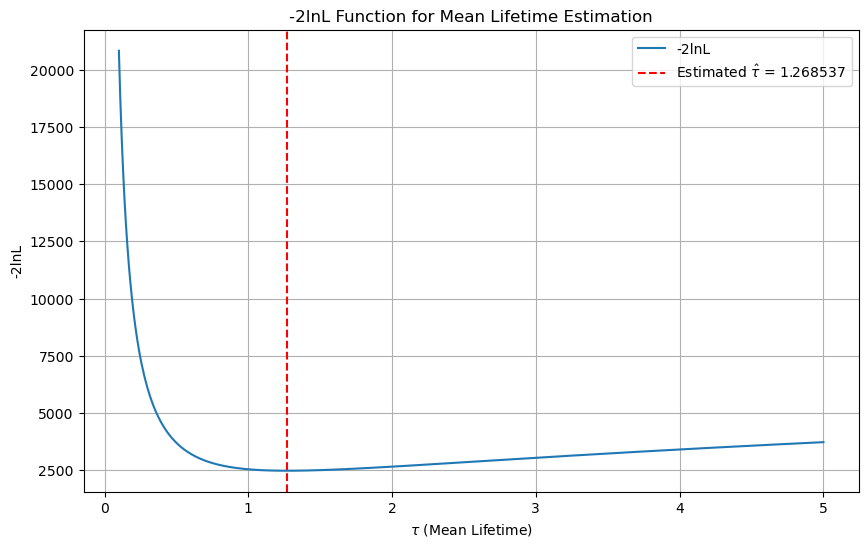

lnL function values for tau_range: [np.float64(2487.3279010564315), np.float64(2487.027440072588), np.float64(2486.7339612319406), np.float64(2486.4474182804975), np.float64(2486.1677653170545), np.float64(2485.8949567899886), np.float64(2485.6289474940895), np.float64(2485.369692567426), np.float64(2485.1171474882367), np.float64(2484.8712680718663), np.float64(2484.6320104677266), np.float64(2484.3993311562876), np.float64(2484.173186946109), np.float64(2483.953534970893), np.float64(2483.7403326865774), np.float64(2483.533537868451), np.float64(2483.3331086083044), np.float64(2483.1390033116095), np.float64(2482.951180694729), np.float64(2482.7695997821515), np.float64(2482.59421990376), np.float64(2482.425000692125), np.float64(2482.261902079832), np.float64(2482.104884296825), np.float64(2481.9539078677926), np.float64(2481.8089336095672), np.float64(2481.669922628559), np.float64(2481.536836318217), np.float64(2481.4096363565086), np.float64(2481.2882847034352), np.float64(2481.1

In [17]:


# Calculate the sum of the lifetimes and the number of measurements (n)
# not necessary to define here, can also define through the function arguments
sum_of_lifetimes = np.sum(np.array(dataPoints))
n = len(dataPoints)

# Define the log-likelihood function -2lnL for a range of tau values

def lnL(tau, t_i):
    """-2 log likelihood, given
    taus and measurement data t_i"""
    return -2 * (-len(t_i) * np.log(tau) - np.sum(np.array(t_i)) / tau)

# Generate a range of tau values for plotting
tau_values = np.linspace(0.1, 5, 500)

# Calculate the -2lnL values
lnL_values = lnL(tau_values, dataPoints)

# Find the tau that minimizes -2lnL (i.e., maximizes the likelihood)
min_index = np.argmin(lnL_values)
tau_hat = tau_values[min_index]

# finding uncertainty sigma_tauhat using second derivative relation
tau_range = np.linspace(tau_hat - .1, tau_hat + .1, 100) # small linspace around tau_hat

nll_values = [lnL(tau, dataPoints) for tau in tau_range]

second_derivative = np.gradient(np.gradient(nll_values, tau_range), tau_range)[49]  # Central point

sigma_tau_hat = np.sqrt(1 / second_derivative)

# Plot the -2lnL function
plt.figure(figsize=(10, 6))
plt.plot(tau_values, lnL_values, label='-2lnL')
plt.axvline(x=tau_hat, color='r', linestyle='--', label=f'Estimated $\\hat{{\\tau}}$ = {tau_hat:3f}')
plt.title('-2lnL Function for Mean Lifetime Estimation')
plt.xlabel('$\\tau$ (Mean Lifetime)')
plt.ylabel('-2lnL')
plt.legend()
plt.grid(True)
plt.show()

print("lnL function values for tau_range: {}".format(nll_values))
print("Second derivative values: {}".format(second_derivative))
print("Tau expectation: {}".format(tau_hat))
print("Tau uncertainty: {}".format(sigma_tau_hat))


### Problem 5 ###

In [18]:


# Perform the minimization of the negative log-likelihood
initial_guess = [1.0]  # Initial guess for tau
result = minimize(lnL, initial_guess, args=(dataPoints,))

# Extract the estimated tau value from the result
tau_hat_mle = result.x[0]

# Estimate the uncertainty of tau (sigma_tau) using the inverse of the Hessian matrix (approximation)

uncertainty_estimate = np.sqrt(1 / (n / tau_hat_mle**2))

tau_hat_mle, uncertainty_estimate


(np.float64(1.2712647369977312), np.float64(0.04020092077967756))

# Exercises \#3 #

### Problem 1 ###

<>:55: SyntaxWarning: invalid escape sequence '\d'
<>:55: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_1699/820856365.py:55: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('Acceleration ($\dfrac{m}{s^2}$)')


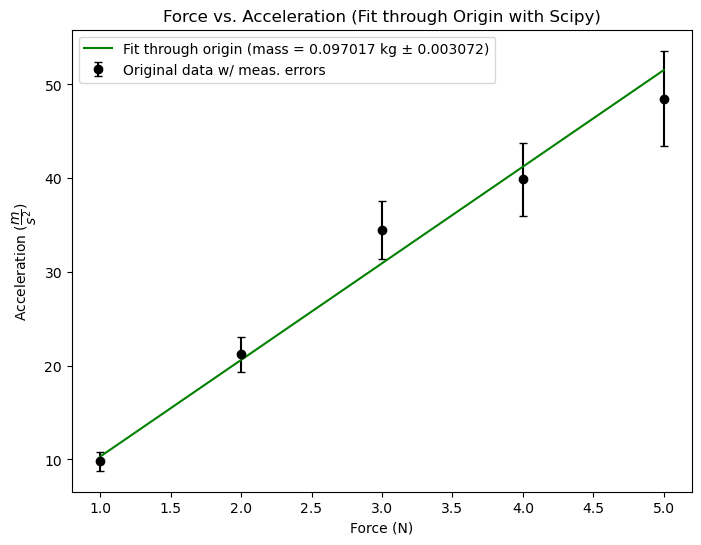

Estimated mass: 0.097017 kg
Uncertainty in mass: 0.003072 kg
Calculated slope: 10.307446
Estimated slope uncertainty: 0.326389
[[0.10652985]]


In [19]:
# Problem 1 F = ma
accelerations = [9.8, 21.2, 34.5, 39.9, 48.5]
errors = [1.0, 1.9, 3.1, 3.9, 5.1]
forces = [1, 2, 3, 4, 5]
# coefficients, cov_matrix = np.polyfit(forces, accelerations, 1, cov=True)
# slope = coefficients[0]
# slope_uncertainty = np.sqrt(cov_matrix[0, 0])
# mass_th = 1 / slope
# mass_expt = np.divide(forces, accelerations)
# fit = np.polyval(coefficients, forces)

# plt.figure()
# plt.errorbar(forces, accelerations, yerr=errors, fmt='o', capsize=5, capthick=2, ecolor='red', label='Measurements with C = 68%')
# plt.plot(forces, fit, color='green', label='1st desgree poly fit m = {} [kg]'.format(round(mass, 3)))
# plt.xlabel('applied force ($N$)')
# plt.ylabel('acceleration ($\dfrac{m}{s^2}$)')
# plt.legend()
# plt.show()
# print(slope)
# print('Fit mass: {}'.format(mass))
# print('Mass is {} with uncertainty {}'.format(round(mass, 3), round(slope_uncertainty, 7)))
# ^^^ with numpy cannot force the 0,0 origin ^^^ ###

# Define the model function (linear relationship through the origin)
def linear_model(F, theta):
    return theta * F # line a = theta * F = 1/m * F, slope is theta = 1/m

# Example data: forces (N) and accelerations (m/s^2)
forces_array = np.array(forces)
accelerations_array = np.array(accelerations)
errors_array = np.array(errors)

# Use curve_fit to fit the model to the data
# popt contains the optimal parameters, pcov is the covariance matrix
popt, pcov = curve_fit(linear_model, forces_array, accelerations_array, sigma=np.array(errors))

# Extract the estimated slope (1/m) and calculate its uncertainty
estimated_slope = popt[0]
slope_uncertainty = np.sqrt(pcov[0, 0])

# Calculate the expected mass and its uncertainty (since slope = 1/m)
mass = 1 / estimated_slope
mass_uncertainty = mass**2 * slope_uncertainty

# Generate fitted values for plotting
fitted_values = linear_model(forces_array, *popt)

# Plotting
plt.figure(figsize=(8, 6))
plt.errorbar(forces_array, accelerations_array, yerr=np.array(errors), fmt='ok', capsize=3, label='Original data w/ meas. errors')  # Original data points
plt.plot(forces_array, fitted_values, '-g', label=f'Fit through origin (mass = {mass:.6f} kg ± {mass_uncertainty:.6f})')  # Fitted line

# Labels and legend
plt.xlabel('Force (N)')
plt.ylabel('Acceleration ($\dfrac{m}{s^2}$)')
plt.title('Force vs. Acceleration (Fit through Origin with Scipy)')
plt.legend()

plt.show()

# Print the estimated mass and its uncertainty
print(f"Estimated mass: {mass:.6f} kg")
print(f"Uncertainty in mass: {mass_uncertainty:.6f} kg")
print(f"Calculated slope: {estimated_slope:.6f}")
print(f"Estimated slope uncertainty: {slope_uncertainty:.6f}")
print(pcov)


### Problem 2 ###

In [20]:
# analytical chi-square

def chi_squared(theta, forces, accelerations, acc_errors):
    y_ideal = forces * theta
    chi_sq = np.sum(((accelerations - y_ideal) / acc_errors) ** 2)
    return chi_sq

# minimize chi-squared funtcion
initial_guess = [10.0] # theta initial guess based on previous result
res = minimize(chi_squared, initial_guess, args=(forces_array, accelerations_array, errors_array))

theta_optimized = res.x[0] # theta access through .x[0]
m_optimized = 1 / theta_optimized # mass estimate according to theta

print("Estimated theta: {}".format(theta_optimized))
print("Estimated mass: {}".format(m_optimized))


Estimated theta: 10.307445668941543
Estimated mass: 0.0970172467668887


### Problem 3 & 4 ###

<>:19: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:25: SyntaxWarning: invalid escape sequence '\c'
<>:19: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:25: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_1699/1792108552.py:19: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(theta_values, chi_squared_values, label='$\chi^2$ Function')
/tmp/ipykernel_1699/1792108552.py:21: SyntaxWarning: invalid escape sequence '\s'
  plt.axvline(x=optimal_theta+theta_uncertainty, color='red', linestyle='--', label='+/- $1\sigma_{\Theta}$')
/tmp/ipykernel_1699/1792108552.py:24: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$\chi^2$')
/tmp/ipykernel_1699/1792108552.py:25: SyntaxWarning: invalid escape sequence '\c'
  plt.title('$\chi^2$ Function of $\\theta$')


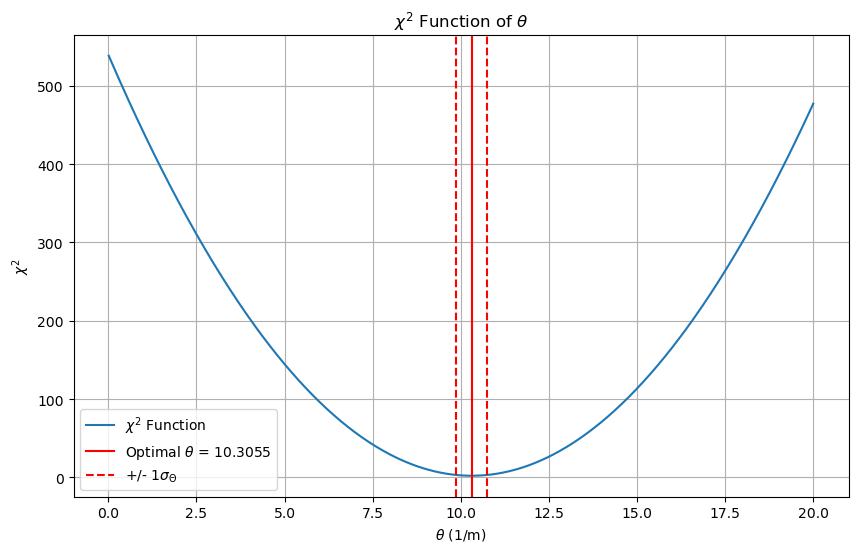

Theta optimized: 10.305450901803606
Theta uncertainty: 0.44066132264529045
m hat: 0.09703602583997419
Sigma m hat: 0.004149262744379479


In [21]:
# Define a range of theta values for plotting the chi^2 function
theta_values = np.linspace(0.01, 20, 500)

# Calculate chi^2 for each theta value
chi_squared_values = [chi_squared(theta, forces_array, accelerations_array, errors_array) for theta in theta_values]

# Find the theta that minimizes chi^2
min_chi_squared = min(chi_squared_values) # min chi
optimal_theta_index = chi_squared_values.index(min_chi_squared) # theta index using min chi index
optimal_theta = theta_values[optimal_theta_index] # find theta by index

# Estimate the uncertainty in theta by finding the width of the curve at chi^2_min + 1
upper_index = np.where(chi_squared_values <= min_chi_squared + 1)[0][-1] 
lower_index = np.where(chi_squared_values <= min_chi_squared + 1)[0][0]
theta_uncertainty = (theta_values[upper_index] - theta_values[lower_index]) / 2

# Plot chi^2 as a function of theta
plt.figure(figsize=(10, 6))
plt.plot(theta_values, chi_squared_values, label='$\chi^2$ Function')
plt.axvline(x=optimal_theta, color='red', linestyle='-', label=f'Optimal $\\theta$ = {optimal_theta:.4f}')
plt.axvline(x=optimal_theta+theta_uncertainty, color='red', linestyle='--', label='+/- $1\sigma_{\Theta}$')
plt.axvline(x=optimal_theta-theta_uncertainty, color='red', linestyle='--')
plt.xlabel('$\\theta$ (1/m)')
plt.ylabel('$\chi^2$')
plt.title('$\chi^2$ Function of $\\theta$')
plt.legend()
plt.grid(True)
plt.show()

# Calculate m and its uncertainty from theta and its uncertainty
m_hat = 1 / optimal_theta
sigma_m_hat = m_hat * (theta_uncertainty / optimal_theta)  # Error propagation formula

print("Theta optimized: {}".format(optimal_theta))
print("Theta uncertainty: {}".format(theta_uncertainty))
print("m hat: {}".format(m_hat))
print("Sigma m hat: {}".format(sigma_m_hat))


# Exercises \#4 #

### Problem 1 ###

In [22]:
def n_choose_k(n, k): # after consultation with AI, conclude that need to use logarithms to deal with large numbers
    f = np.subtract(n, k)
    log_way = np.log(factorial(n)) - np.log(factorial(k)) - np.log(factorial(f))
    return np.exp(log_way)

In [23]:
def binomial_p(n, k, p): # adjust according 
    f = np.subtract(n, k)
    q = np.subtract(1, p)
    
    # handles boundary cases for p == 0 or q == 0
    if p == 0:
        return 1.0 if k == 0 else 0.0
    elif p == 1:
        return 1.0 if k == n else 0.0
    
    result = np.multiply(np.multiply(n_choose_k(n, k), np.power(p, k)), np.power(q, f))
    
    return result

In [24]:
# tests
n = 4
k = 1
f = np.subtract(n, k)
p = .25
q = np.subtract(1, p)

test_multiply = np.multiply(factorial(k), factorial(f))
test_division = np.divide(factorial(n), test_multiply)
test_nck = n_choose_k(n, k)
test_binomial = binomial_p(n, k, p)

print("---Chosen parameters-------------------------\nn: {}\nk: {}\np: {}".format(n, k, p))
print("---test results------------------------------")
print("n!, k!, f!: {}, {}, {}".format(factorial(n), factorial(k), factorial(f)))
print("k! * f!: {}".format(test_multiply))
print("n!/(k!*f!): {}".format(test_division))
print("n choose k: {}".format(test_nck))
print("binomial p_hat: {}".format(test_binomial))
print("----------------------------------------------")


---Chosen parameters-------------------------
n: 4
k: 1
p: 0.25
---test results------------------------------
n!, k!, f!: 24.0, 1.0, 6.0
k! * f!: 6.0
n!/(k!*f!): 4.0
n choose k: 4.000000000000001
binomial p_hat: 0.4218750000000001
----------------------------------------------


### Problem 2 ###

In [25]:

def cumulative_binomial_probability(n, k, p, lower=True):
    cumulative = 0.0
    if lower:
        for x in range(0, k+1):
            cumulative += binomial_p(n, x, p)
    else:
        for x in range(k, n+1):
            cumulative += binomial_p(n, x, p)
    return cumulative

p_arr = np.linspace(0.00001, 1, 1000)
def find_cp(k, n, CL):
    step = 0.001
    p_low = 0.0
    p_upp = 1.0

    for p in [i*step for i in range(1001)]:
        if cumulative_binomial_probability(n, k, p) <= (1 - CL) / 2:
            p_upp = p
            break
    for p in reversed([i*step for i in range(1001)]):
        if cumulative_binomial_probability(n, k, p, lower=False) <= (1 - CL) / 2:
            p_low = p
            break
    
    p_upp = 0.0 if p_upp is None else p_upp
    p_low = 1.0 if p_low is None else p_low

    return [p_low, p_upp]

find_cp(8, 10, .68)

[0.595, 0.928]

### Problem 3 ###

In [26]:
def prod_belt(k):
    belt_list = []
    events = k    
    for i in list(range(k+1)):
        k_success = i
        belt_list.append(find_cp(k_success, events, .68))
    return belt_list

belt = prod_belt(10)
print(belt)

plt.figure(figsize=(4, 3))

# Plot and fill the confidence intervals for each r
for r, (p_lower, p_upper) in zip(r_values, belt):
    plt.fill_betweenx([p_lower, p_upper], r-0.5, r+0.5, color='lightblue')

plt.ylabel('Probability of Success p')
plt.xlabel('Number of Successes r')
plt.title('Neyman Confidence Belt for N=10 Trials')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0, 1)
plt.xlim(0, N)

# Display the plot
plt.show()

[[0.0, 0.168], [0.017, 0.294], [0.07200000000000001, 0.405], [0.14200000000000002, 0.508], [0.22, 0.604], [0.305, 0.6950000000000001], [0.396, 0.78], [0.492, 0.858], [0.595, 0.928], [0.706, 0.983], [0.8320000000000001, 1.0]]


NameError: name 'r_values' is not defined

<Figure size 400x300 with 0 Axes>

### Problem 4 ###

In [ ]:
# Simulate experiments
n_experiments = 1000
covered_count = 0
for _ in range(n_experiments):
    CL = .68
    n_rolls = 10
    p_true = 1/n_rolls
    rolls = np.random.randint(1, 7, n_rolls)  # Simulate rolling a die 10 times
    k = np.sum(rolls == 6)  # Count the number of 6s rolled
    
    # Calculate Clopper-Pearson interval for the observed k
    interval = find_cp(k, n_rolls, CL)
    
    # Check if p_true is within the interval
    if interval[0] <= p_true <= interval[1]:
        covered_count += 1

# Calculate the proportion of experiments where p_true is covered by the interval
coverage_proportion = covered_count / n_experiments
coverage_proportion

0.787

# Exercises \#5 #

### Problem 1 ###

Need to consider 1000 data points in each simulation (according to experiment)

In [ ]:
# H_0 says that mean height for a woman in Spain is 164.7 cm
# w/ (set this as a test statistic)
# Expect a gaussian distribution?

# values in [cm]
t_zara_sim = 164.7
sigma_zara_sim = 7.1

# number of data points in expt. and simulations
n_data_zara_sim = 1000

# definition of simulation
def gaus_simulation(number_of_simuations, sigma, mu, sample_size):
    simulations_list = []
    means = []
    for simulation in range(number_of_simuations):
        sim = norm.rvs(loc=mu, scale=sigma, size=sample_size)
        simulations_list.append(sim)
        means.append(np.mean(np.array(sim)))
    
    count, bins, ignored = plt.hist(means, 31, density=True, color='cyan')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    mu_est, sigma_est = norm.fit(means)
    p = norm.pdf(x, mu_est, sigma_est)
    return [means, x, p, mu_est, sigma_est]






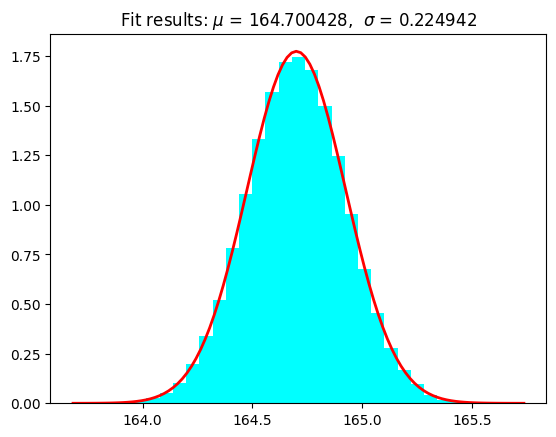

In [ ]:
plot_zara_test_milli = gaus_simulation(100000, sigma_zara_sim, t_zara_sim, 1000)

plt.plot(plot_zara_test_milli[1], plot_zara_test_milli[2], 'red', linewidth=2)
title = "Fit results: $\mu$ = %.6f,  $\sigma$ = %.6f" % (plot_zara_test_milli[3], plot_zara_test_milli[4])
plt.title(title)

plt.show()


In [ ]:
sigma_zara_sim = plot_zara_test_milli[4]
mu_zara_sim = plot_zara_test_milli[3]
zara_x_values = np.linspace(164, 165.5, 10000)
zara_x_found = 0
zara_found_2point5cr = 0

for xi in zara_x_values:
    zara_integral, _ = integrate.quad(gaus, xi, np.inf, args=(sigma_zara_sim, mu_zara_sim))
    if abs(zara_integral-.025) <= 0.0001:
        zara_found_2point5cr = zara_integral
        zara_x_found = xi
        break


In [ ]:
print(zara_found_2point5cr)
print((zara_x_found - plot_zara_test_milli[3])/plot_zara_test_milli[4])
zara_integral_test, _ = integrate.quad(gaus, -np.inf, np.inf, args=(sigma_zara_sim, mu_zara_sim))
print(zara_integral_test)

0.02506747913152652
1.9588107151257776
0.0


In [ ]:
zara_heights_real = []
with open('heights.txt', 'r') as zara_data:
    lines = zara_data.readlines()
    for line in lines:
        zara_heights_real.append(float(line))



In [ ]:
mu_zara_expt, sigma_zara_expt = norm.fit(zara_heights_real)
print(mu_zara_expt)
print(sigma_zara_expt)

164.69159999999997
7.281153029568873


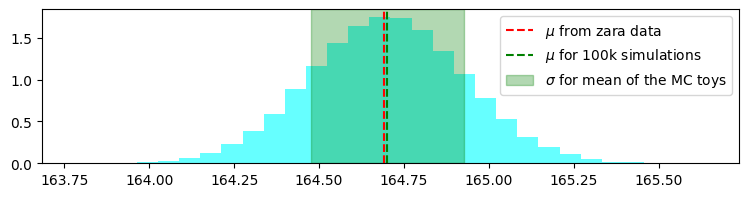

In [ ]:

plt.figure(figsize=(9, 2))
plt.axvline(x=mu_zara_expt, color='red', linestyle='--', label='$\mu$ from zara data')
# plt.axvspan(mu_zara_expt-sigma_zara_expt, mu_zara_expt+sigma_zara_expt, color='red', alpha=0.5)
plt.hist(plot_zara_test_milli[0], bins=30, density=True, color='cyan', alpha=0.6)
plt.axvline(x=mu_zara_sim, color='green', linestyle='--', label='$\mu$ for 100k simulations')
plt.axvspan(mu_zara_sim-sigma_zara_sim, mu_zara_sim+sigma_zara_sim, color='green', alpha=0.3, label='$\sigma$ for mean of the MC toys')
plt.legend()
plt.show()

